In [1]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("diabetes(1).csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#Shape of Data
data.shape

(768, 9)

In [ ]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#lets describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

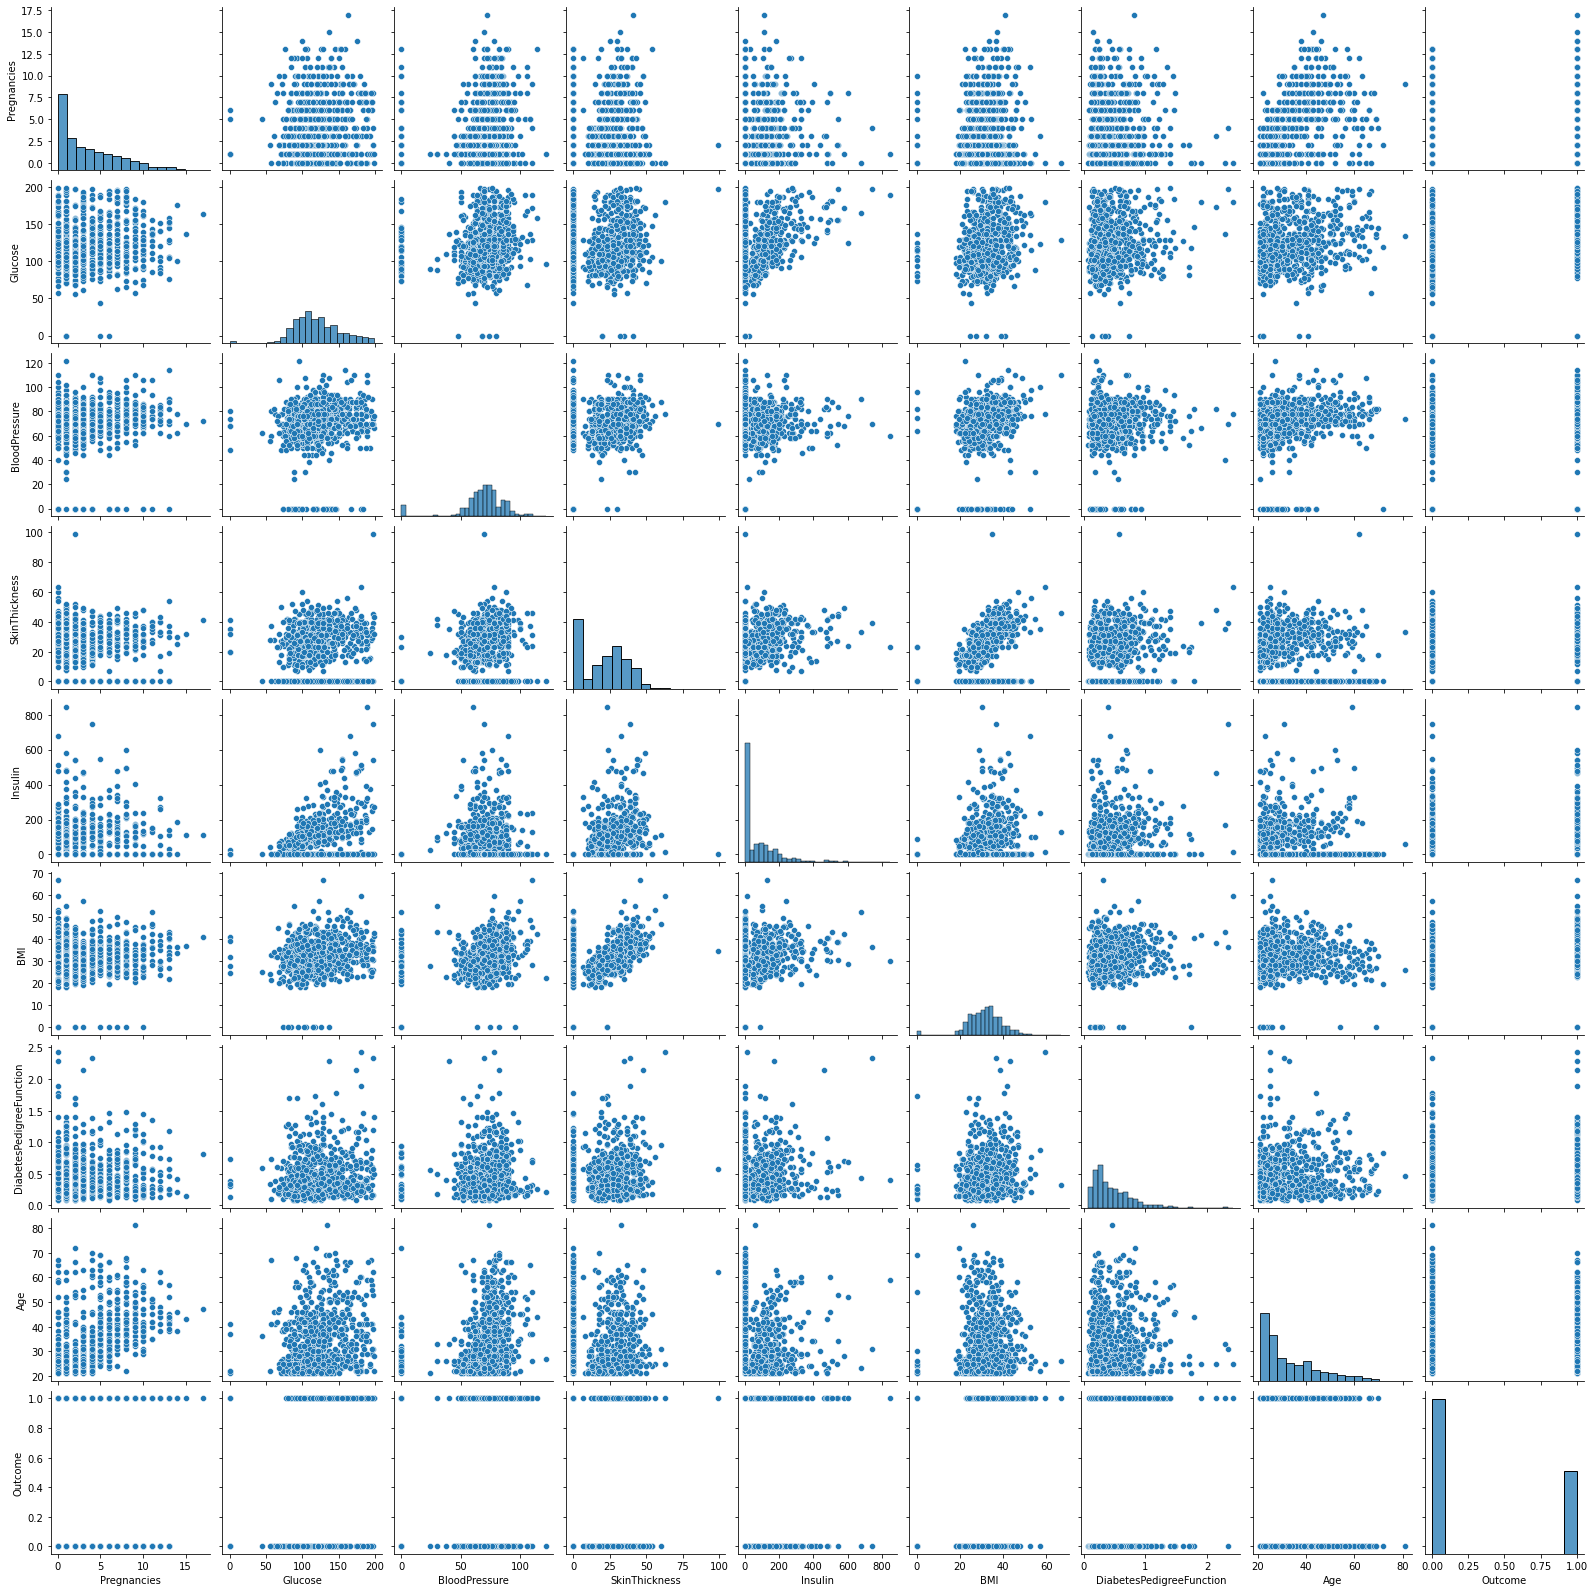

In [ ]:
sns.pairplot(data)

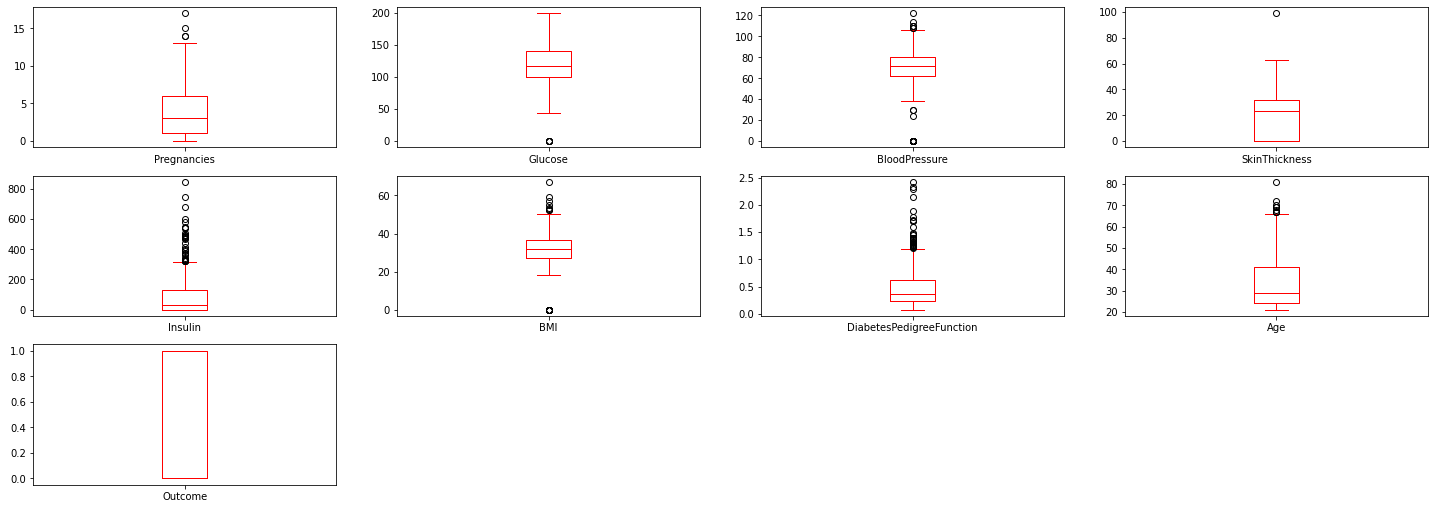

In [ ]:
data.plot(color = 'r', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

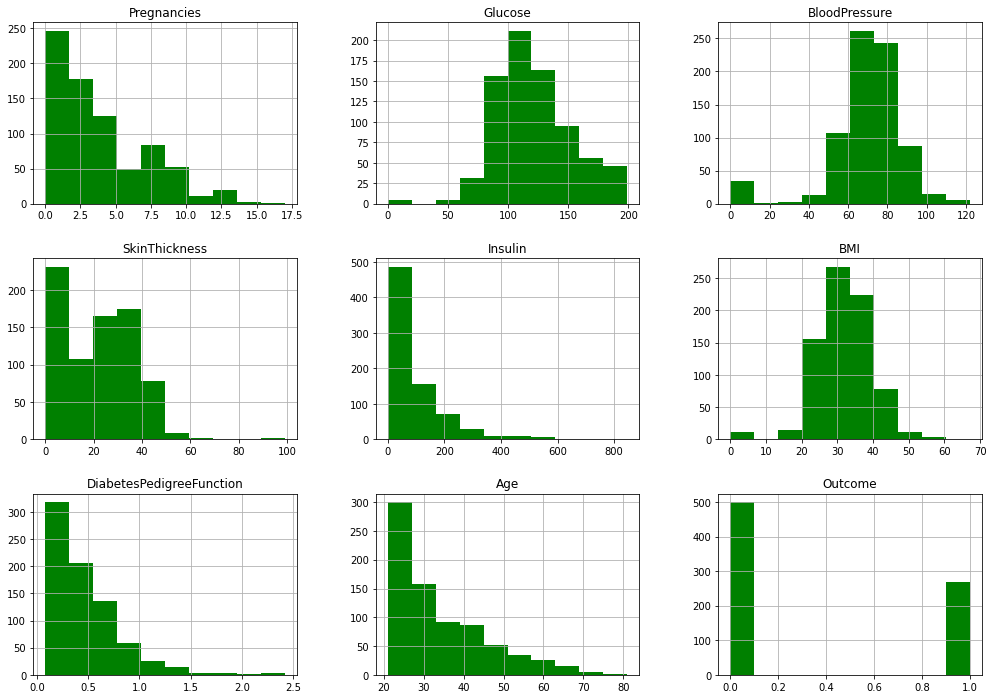

In [ ]:
#histogram
data.hist(color='green',bins=10,figsize=(17,12))
plt.show()

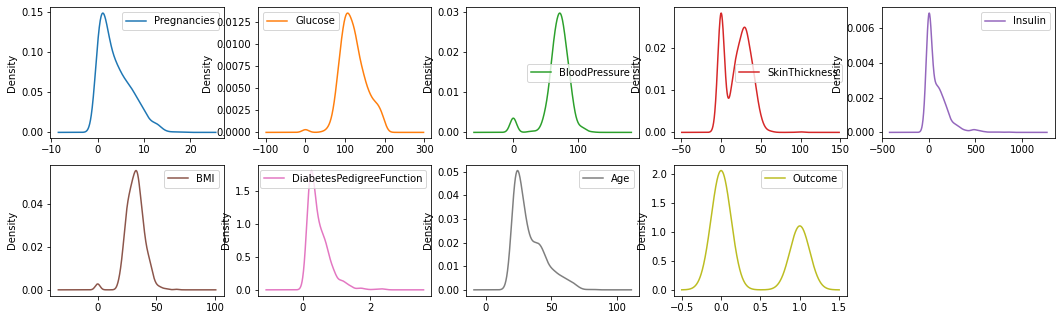

In [ ]:
#Boxplot of each column
data.plot( kind='density', figsize=(18,14), subplots=True, layout=(5,5),sharex=False)
plt.show()

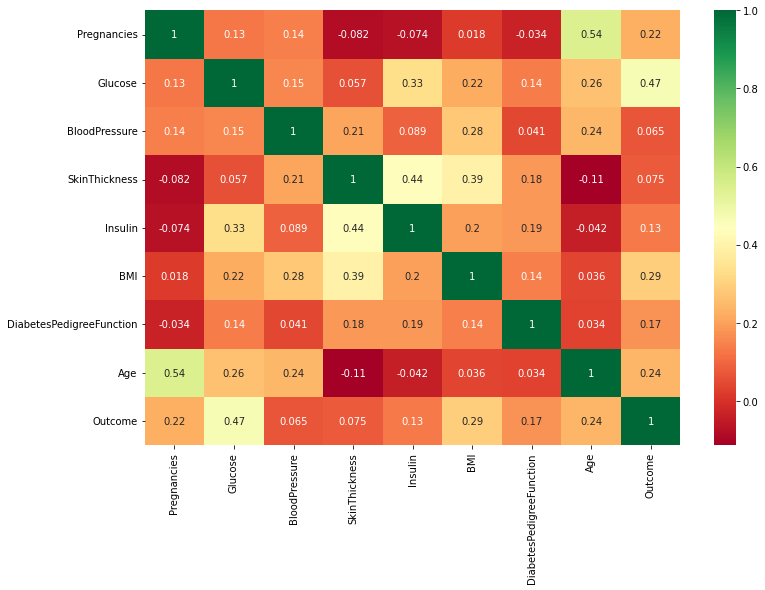

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


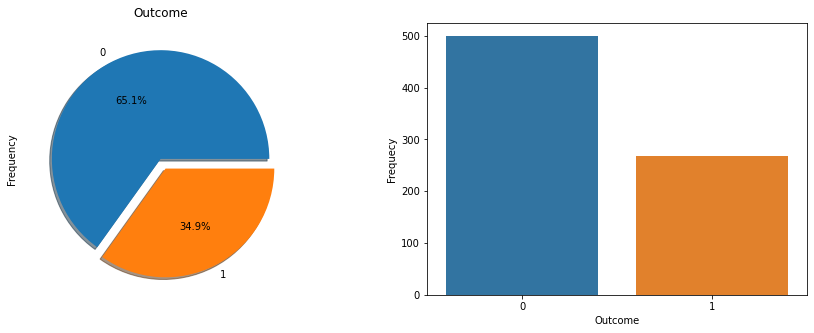

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['Outcome'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")

#Piechart show
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('Frequency')
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#reading data from pandas
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv("diabetes(1).csv", header=1, names=col_names)

<AxesSubplot:>

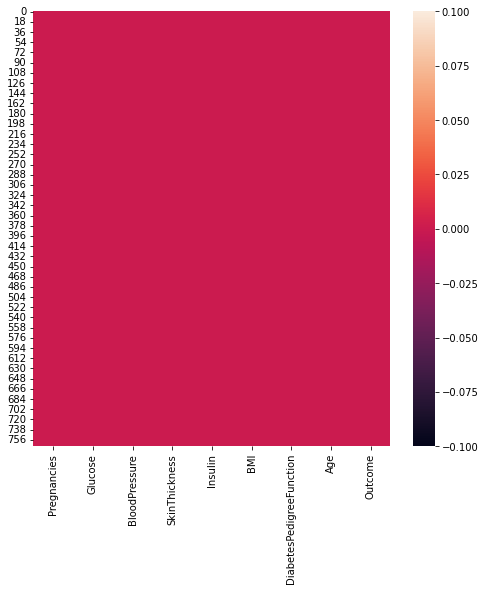

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
X = data.drop(['Outcome'],axis=1)
Y = data['Outcome']

Pregnancies -> 0.10621195
Glucose -> 0.24240209
BloodPressure -> 0.088033706
SkinThickness -> 0.07818192
Insulin -> 0.10381888
BMI -> 0.14867325
DiabetesPedigreeFunction -> 0.100592084
Age -> 0.13208608


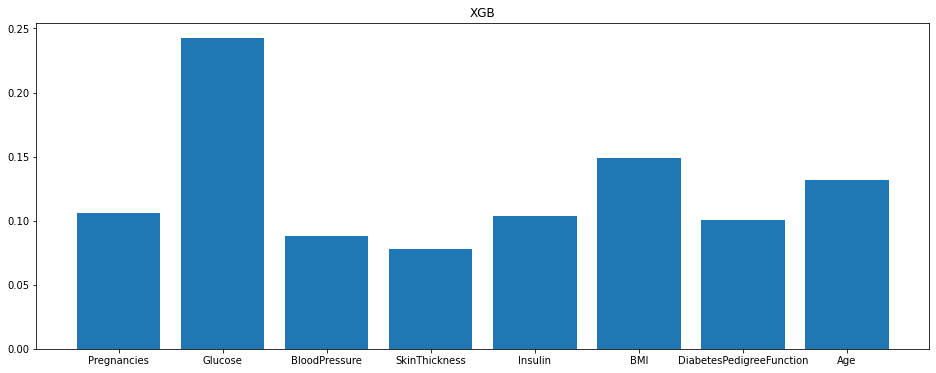

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

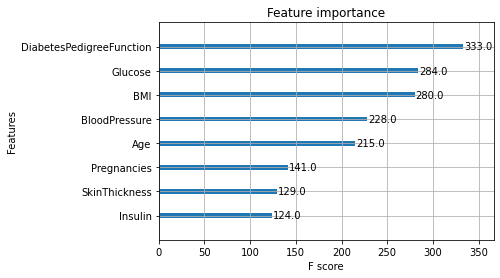

In [ ]:
XGBR = XGBClassifier()
XGBR.fit(X,Y)
features = XGBR.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
    print(Columns[i],"->",j)

plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()

plot_importance(XGBR)

In [ ]:
#X = data.drop([ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age' ],axis=1)
#Y = data['Outcome']
#X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.40,random_state=27)

#define predictor and response variables
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data[ 'Outcome']

#define cross-validation method to use
cv = KFold(n_splits=20, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=27)

models = []
#models.append(("XGB",XGBClassifier()))
#models.append(("RF",RandomForestClassifier()))
#models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))
models.append(("XGB",XGBClassifier()))
#ensemble = VotingClassifier(estimators=models)
#ensemble.fit(X_train,y_train)
#y_pred = ensemble.predict(X_test) 
#print(classification_report(y_pred,y_test))
#print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



#SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
#SVM.fit(X_train,y_train)
#y_pred = SVM.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.01,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


#RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF.fit(X_train,y_train)
#y_pred = RF.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model1 = GradientBoostingClassifier(random_state=0)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model2 = AdaBoostClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

Model3 = LGBMClassifier(random_state=0)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("LightGBM Classifier:>",accuracy_score(y_pred,y_test))

Model4 = CatBoostClassifier(random_state=0)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("CatBoost Classifier:>",accuracy_score(y_pred,y_test))

#Model5 = LinearDiscriminantAnalysis()
#Model5.fit(X_train,y_train)
#y_pred = Model5.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

#KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
#KNN.fit(X_train,y_train)
#y_pred = KNN.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))

#e=2.7
#Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
#max_features=1.0, max_leaf_nodes=10,
#min_impurity_split=1*e-7, min_samples_leaf=1,
#min_samples_split=2, min_weight_fraction_leaf=0.10,
#random_state=27, splitter='best')
#Model3.fit(X_train,y_train)
#y_pred = Model3.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


#Model7 = GaussianNB()
#Model7.fit(X_train,y_train)
#y_pred = Model7.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("GaussianNB:>",accuracy_score(y_pred,y_test))




#Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 #         intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
  #        penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
   #       verbose=0, warm_start=False)
#Model8.fit(X_train,y_train)
#y_pred = Model8.predict(X_test)
#print(classification_report(y_pred,y_test))
#print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       158
           1       0.54      0.59      0.57        73

    accuracy                           0.71       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.72      0.71      0.72       231

XGBoost:> 0.7142857142857143
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       163
           1       0.56      0.65      0.60        68

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.76      0.74      0.75       231

GradientBoostingClassifier:> 0.7445887445887446
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       170
           1       0.54      0.70      0.61        61

    accuracy                           0.77       231
   macro avg       0.71      0.75      0.72       2

In [ ]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

XGBR = XGBClassifier(learning_rate =0.01,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.58      0.58      0.58        74

    accuracy                           0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231

0.7316017316017316


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print((accuracy_score(y_test, y_pred))) # printing accuracy

0.7792207792207793


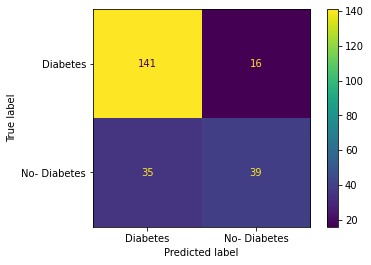

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Diabetes","No- Diabetes"])


cm_display.plot()
plt.show() 

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = XGBC.feature_importances_
features

array([0.11765973, 0.1759257 , 0.10729683, 0.10510505, 0.11220665,
       0.13841695, 0.11544444, 0.12794465], dtype=float32)

[Text(0, 0, '0.11766'),
 Text(0, 0, '0.175926'),
 Text(0, 0, '0.107297'),
 Text(0, 0, '0.105105'),
 Text(0, 0, '0.112207'),
 Text(0, 0, '0.138417'),
 Text(0, 0, '0.115444'),
 Text(0, 0, '0.127945')]

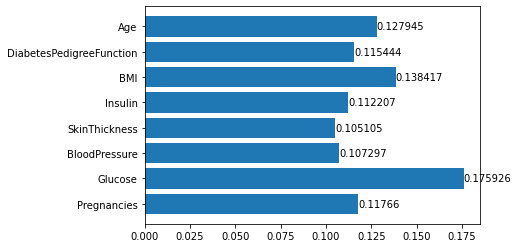

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(featur_names,features)
ax.bar_label(bars)

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = Model1.feature_importances_
features

array([0.06347549, 0.40110881, 0.05412223, 0.0228919 , 0.04250769,
       0.19604096, 0.09770054, 0.12215238])

[Text(0, 0, '0.0634755'),
 Text(0, 0, '0.401109'),
 Text(0, 0, '0.0541222'),
 Text(0, 0, '0.0228919'),
 Text(0, 0, '0.0425077'),
 Text(0, 0, '0.196041'),
 Text(0, 0, '0.0977005'),
 Text(0, 0, '0.122152')]

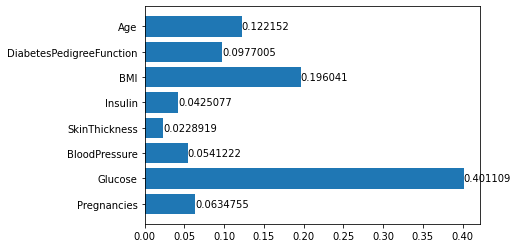

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(featur_names,features)
ax.bar_label(bars)

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = Model2.feature_importances_
features

array([0.06, 0.18, 0.06, 0.06, 0.08, 0.18, 0.26, 0.12])

[Text(0, 0, '0.06'),
 Text(0, 0, '0.18'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.18'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.12')]

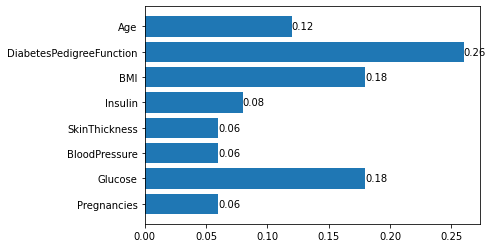

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(featur_names,features)
ax.bar_label(bars)

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = Model3.feature_importances_
features

array([131, 326, 247, 136, 156, 333, 381, 270])

[Text(0, 0, '131'),
 Text(0, 0, '326'),
 Text(0, 0, '247'),
 Text(0, 0, '136'),
 Text(0, 0, '156'),
 Text(0, 0, '333'),
 Text(0, 0, '381'),
 Text(0, 0, '270')]

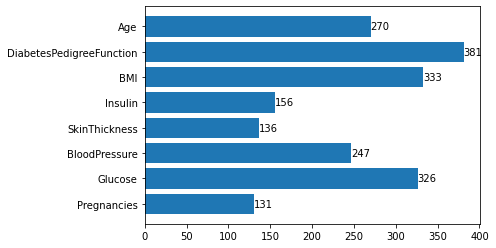

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(featur_names,features)
ax.bar_label(bars)

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = Model4.feature_importances_
features

array([ 9.39150171, 22.49576798,  8.85438757,  6.6039799 ,  7.19419658,
       17.96360683, 13.67864312, 13.81791631])

[Text(0, 0, '9.3915'),
 Text(0, 0, '22.4958'),
 Text(0, 0, '8.85439'),
 Text(0, 0, '6.60398'),
 Text(0, 0, '7.1942'),
 Text(0, 0, '17.9636'),
 Text(0, 0, '13.6786'),
 Text(0, 0, '13.8179')]

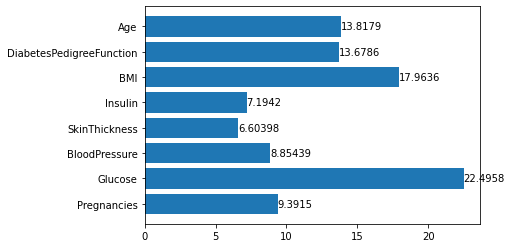

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(featur_names,features)
ax.bar_label(bars)

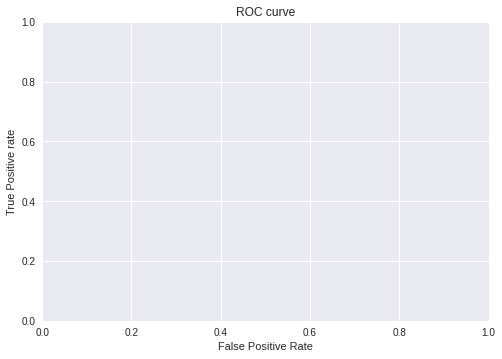

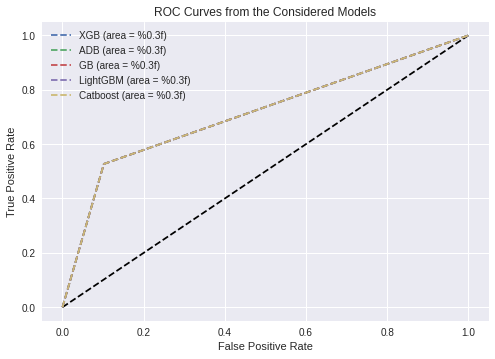

In [ ]:
 # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
fpr_XGBC, tpr_XGBC, _ = roc_curve(y_test, y_pred)
fpr_Model1, tpr_Model1, _ = roc_curve(y_test, y_pred)
roc_auc_XGBC = auc(fpr_XGBC, tpr_XGBC)
roc_auc_Model1 = auc(fpr_Model1, tpr_Model1)
fpr_XGBC, tpr_XGBC,thresholds = roc_curve(y_test, y_pred)
fpr_Model1, tpr_Model1,thresholds = roc_curve(y_test, y_pred)
fpr_Model2, tpr_Model2,thresholds = roc_curve(y_test, y_pred)
fpr_Model3, tpr_Model3,thresholds = roc_curve(y_test, y_pred)
fpr_Model4, tpr_Model4,thresholds = roc_curve(y_test, y_pred)
#plt.plot(fpr_XGBC, tpr_XGBC, linestyle='--',color='orange', label='XGB (area = %0.3f)')
#plt.plot(fpr_Model1,tpr_Model1, linestyle='--',color='green', label='ADB (area = %0.3f)' )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_XGBC, tpr_XGBC,linestyle='--', label='XGB (area = %0.3f)')
plt.plot(fpr_Model1, tpr_Model1, linestyle='--',label='ADB (area = %0.3f)' )
plt.plot(fpr_Model2, tpr_Model2, linestyle='--',label='GB (area = %0.3f)' )
plt.plot(fpr_Model3, tpr_Model3, linestyle='--',label='LightGBM (area = %0.3f)')
plt.plot(fpr_Model4, tpr_Model4, linestyle='--',label='Catboost (area = %0.3f)' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

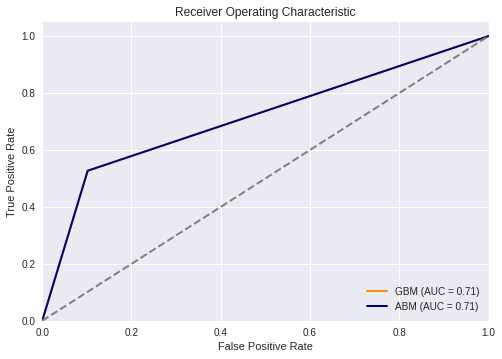

In [ ]:
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred)
fpr_abm, tpr_abm, _ = roc_curve(y_test, y_pred)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
roc_auc_abm = auc(fpr_abm, tpr_abm)

# Plot the ROC curves of the classifiers in a single plot
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label='GBM (AUC = %0.2f)' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, color='navy', lw=2, label='ABM (AUC = %0.2f)' % roc_auc_abm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()